In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import time


In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import time

# Brand URLs
brand_links = {
    "Samsung": "https://www.flipkart.com/search?q=samsung+mobiles",
    "Redmi": "https://www.flipkart.com/search?q=redmi+mobiles",
    "Realme": "https://www.flipkart.com/search?q=realme+mobiles",
    "OnePlus": "https://www.flipkart.com/search?q=oneplus+mobiles",
    "Vivo": "https://www.flipkart.com/search?q=vivo+mobiles"
}

def scrape_flipkart(brand, base_url, pages=20):
    Brand, Model, Price, Rating, Reviews, RAM, ROM, Battery, Screen_Size, Camera = ([] for _ in range(10))
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

    print(f"🔍 Scraping data for: {brand}")

    for page in range(1, pages + 1):
        url = f"{base_url}&page={page}"
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")

        items = soup.find_all("div", class_=["tUxRFH", "_4ddWXP", "_1AtVbE"])
        if not items:
            print(f"⚠️ No more items found on page {page}. Stopping early.")
            break

        for item in items:
            text = item.get_text(separator=" ")

            # Model name
            name_tag = item.find("div", class_=["KzDlHZ", "_4rR01T"]) or item.find("a", class_=["s1Q9rs", "IRpwTa"])
            if name_tag:
                model_name = name_tag.text.strip()
                model_name = re.sub(r"\s*\(.*?\)", "", model_name)  # remove anything inside brackets
                Model.append(model_name.strip())
            else:
                Model.append(np.nan)
            Brand.append(brand)

            # Price
            price_tag = item.find("div", class_=["Nx9bqj", "_30jeq3"])
            Price.append(price_tag.text.strip() if price_tag else np.nan)

            # Rating
            rating_tag = item.find("div", class_=["XQDdHH", "_3LWZlK"])
            Rating.append(rating_tag.text.strip() if rating_tag else np.nan)

            # Reviews
            review_tag = item.find("span", class_=["Wphh3N", "_2_R_DZ"])
            Reviews.append(review_tag.text.strip() if review_tag else np.nan)

            # RAM, ROM, Battery, Screen, Camera
            ram = re.findall(r"(\d+)\s*GB\s*RAM", text)
            rom = re.findall(r"(\d+)\s*GB\s*ROM", text)
            RAM.append(ram[0] if ram else np.nan)
            ROM.append(rom[0] if rom else np.nan)

            battery = re.findall(r"(\d+)\s*mAh", text)
            Battery.append(battery[0] if battery else np.nan)

            screen = re.findall(r"(\d+\.?\d*)\s*inch", text)
            Screen_Size.append(screen[0] if screen else np.nan)

            camera = re.findall(r"(\d+MP\+\d+MP|\d+MP)", text)
            Camera.append(camera[0] if camera else np.nan)

        print(f"✅ Page {page} scraped successfully.")
        time.sleep(1)

    # Create DataFrame
    df = pd.DataFrame({
        "Brand": Brand,
        "Model": Model,
        "Price": Price,
        "Rating": Rating,
        "Reviews": Reviews,
        "RAM(GB)": RAM,
        "ROM(GB)": ROM,
        "Battery(mAh)": Battery,
        "Screen_Size(inch)": Screen_Size,
        "Camera": Camera
    })

    # ✅ Clean model names again (remove brackets if any remain)
    df["Model"] = df["Model"].str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()

    print(f"💾 Saving {brand} data... Rows collected: {len(df)}")
    df.to_csv(f"{brand.lower()}.csv", index=False)
    print(f"✅ {brand} dataset saved successfully!\n")
    return df

# Loop through all brands and scrape
all_dfs = {}
for brand, link in brand_links.items():
    df = scrape_flipkart(brand, link, pages=20)
    all_dfs[brand] = df

print("🎉 All 5 brand datasets have been scraped and saved cleanly!")


🔍 Scraping data for: Samsung
✅ Page 1 scraped successfully.
✅ Page 2 scraped successfully.
✅ Page 3 scraped successfully.
✅ Page 4 scraped successfully.
✅ Page 5 scraped successfully.
✅ Page 6 scraped successfully.
✅ Page 7 scraped successfully.
✅ Page 8 scraped successfully.
✅ Page 9 scraped successfully.
✅ Page 10 scraped successfully.
✅ Page 11 scraped successfully.
✅ Page 12 scraped successfully.
✅ Page 13 scraped successfully.
✅ Page 14 scraped successfully.
✅ Page 15 scraped successfully.
✅ Page 16 scraped successfully.
✅ Page 17 scraped successfully.
✅ Page 18 scraped successfully.
✅ Page 19 scraped successfully.
✅ Page 20 scraped successfully.
💾 Saving Samsung data... Rows collected: 480
✅ Samsung dataset saved successfully!

🔍 Scraping data for: Redmi
✅ Page 1 scraped successfully.
✅ Page 2 scraped successfully.
✅ Page 3 scraped successfully.
✅ Page 4 scraped successfully.
✅ Page 5 scraped successfully.
✅ Page 6 scraped successfully.
✅ Page 7 scraped successfully.
✅ Page 8 scr

In [44]:
import re

def clean_model_names(df):
    # Keep only text before '(' and remove extra spaces
    df['Model'] = df['Model'].apply(lambda x: re.split(r'\(', x)[0].strip())
    return df

# Apply cleaning to all datasets
samsung = clean_model_names(samsung)
redmi = clean_model_names(redmi)
realme = clean_model_names(realme)
oneplus = clean_model_names(oneplus)
vivo = clean_model_names(vivo)

# Save cleaned versions (optional)
samsung.to_csv('samsung_cleaned.csv', index=False)
redmi.to_csv('redmi_cleaned.csv', index=False)
realme.to_csv('realme_cleaned.csv', index=False)
oneplus.to_csv('oneplus_cleaned.csv', index=False)
vivo.to_csv('vivo_cleaned.csv', index=False)

print("✅ All model names cleaned and saved successfully!")


✅ All model names cleaned and saved successfully!


In [46]:
#SAMSUNG
samsung.head(50)

,Brand,Model,Price,Rating,Reviews,RAM(GB),ROM(GB),Battery(mAh),Screen_Size(inch),Camera
0,Samsung,Samsung Galaxy F07,"₹6,799",4.3,815 Ratings & 48 Reviews,4.0,64.0,5000,6.700,50MP
1,Samsung,Samsung Galaxy A35 5G,"₹21,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,128.0,5000,6.600,50MP
2,Samsung,Samsung Galaxy F16 5G,"₹11,499",4.2,"9,343 Ratings & 541 Reviews",6.0,128.0,5000,6.657,50MP
3,Samsung,Samsung M06 5G,"₹8,914",4.0,677 Ratings & 47 Reviews,4.0,128.0,5000,6.700,50MP
4,Samsung,Samsung Galaxy A35 5G,"₹21,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,128.0,5000,6.600,50MP
5,Samsung,Samsung Galaxy A35 5G,"₹23,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,256.0,5000,6.600,50MP
6,Samsung,Samsung Galaxy A35 5G,"₹21,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,128.0,5000,6.600,50MP
7,Samsung,Samsung Galaxy A35 5G,"₹23,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,256.0,5000,6.600,50MP
8,Samsung,Samsung Galaxy A55 5G,"₹24,807",4.4,"4,768 Ratings & 296 Reviews",8.0,128.0,5000,6.600,50MP
9,Samsung,Samsung M06 5G,"₹8,976",4.0,677 Ratings & 47 Reviews,4.0,128.0,5000,6.700,50MP


In [47]:
#REDMI 
redmi.head(50)

,Brand,Model,Price,Rating,Reviews,RAM(GB),ROM(GB),Battery(mAh),Screen_Size(inch),Camera
0,Redmi,REDMI A3X,"₹6,499",4.1,"9,422 Ratings & 392 Reviews",4.0,128.0,5000.0,6.71,8MP
1,Redmi,REDMI A5,"₹7,499",4.2,"3,840 Ratings & 194 Reviews",4.0,128.0,5200.0,6.88,32MP
2,Redmi,REDMI Note 14 SE 5G,"₹13,499",4.3,"14,070 Ratings & 567 Reviews",6.0,128.0,5110.0,6.67,50MP
3,Redmi,REDMI A5 - Locked with Airtel Prepaid,"₹5,999",4.1,"5,106 Ratings & 226 Reviews",3.0,64.0,5200.0,6.88,32MP
4,Redmi,REDMI A5,"₹6,499",4.1,"5,106 Ratings & 226 Reviews",3.0,64.0,5200.0,6.88,32MP
5,Redmi,REDMI A5 - Locked with Airtel Prepaid,"₹5,999",4.1,"5,106 Ratings & 226 Reviews",3.0,64.0,5200.0,6.88,32MP
6,Redmi,REDMI A4,"₹8,744",4.3,"11,094 Ratings & 477 Reviews",4.0,128.0,5160.0,6.88,50MP
7,Redmi,REDMI A4,"₹9,394",4.2,824 Ratings & 31 Reviews,6.0,128.0,5160.0,6.88,50MP
8,Redmi,REDMI A4 5G only on Jio SIM,"₹7,960",4.3,"11,094 Ratings & 477 Reviews",4.0,64.0,5160.0,6.88,50MP
9,Redmi,REDMI A5,"₹6,499",4.1,"5,106 Ratings & 226 Reviews",3.0,64.0,5200.0,6.88,32MP


In [48]:
#REALME
realme.head(50)

,Brand,Model,Price,Rating,Reviews,RAM(GB),ROM(GB),Battery(mAh),Screen_Size(inch),Camera
0,Realme,realme C61,"₹6,499",4.4,"33,054 Ratings & 1,038 Reviews",4,64.0,5000.0,6.745,32MP
1,Realme,realme C61,"₹6,499",4.4,"33,054 Ratings & 1,038 Reviews",4,64.0,5000.0,6.745,32MP
2,Realme,realme P3x 5G,"₹11,499",4.4,"60,539 Ratings & 2,262 Reviews",6,128.0,6000.0,6.720,50MP
3,Realme,realme C71,"₹8,699",4.2,"5,916 Ratings & 224 Reviews",6,128.0,6300.0,6.750,13MP
4,Realme,realme Narzo 80 Lite 4G,"₹7,423",4.3,"1,193 Ratings & 48 Reviews",4,64.0,6300.0,6.740,13MP
5,Realme,realme Narzo 80 Lite 4G,"₹7,349",4.3,"1,193 Ratings & 48 Reviews",4,64.0,6300.0,6.740,13MP
6,Realme,realme Narzo 80 Lite 4G,"₹8,399",4.3,728 Ratings & 39 Reviews,6,128.0,6300.0,6.740,13MP
7,Realme,realme 15x 5G,"₹16,999",4.4,"2,130 Ratings & 167 Reviews",6,128.0,7000.0,6.800,50MP
8,Realme,realme C71,"₹7,494",4.4,212 Ratings & 7 Reviews,4,64.0,6300.0,6.750,13MP
9,Realme,realme P3 Lite 5G Charger in the Box,"₹10,499",4.4,"4,548 Ratings & 182 Reviews",4,128.0,6000.0,6.670,32MP


In [49]:
#VIVO
vivo.head(50)

,Brand,Model,Price,Rating,Reviews,RAM(GB),ROM(GB),Battery(mAh),Screen_Size(inch),Camera
0,Vivo,vivo T4 Lite 5G Charger in the Box,"₹10,499",4.4,"34,302 Ratings & 1,019 Reviews",4.0,128.0,6000,6.74,50MP
1,Vivo,vivo T4x 5G,"₹14,499",4.4,"1,80,231 Ratings & 8,062 Reviews",6.0,128.0,6500,6.72,50MP
2,Vivo,vivo T4 Lite 5G Charger in the Box,"₹13,499",4.3,"16,656 Ratings & 724 Reviews",8.0,256.0,6000,6.74,50MP
3,Vivo,vivo T4 Lite 5G Charger in the Box,"₹10,499",4.4,"34,302 Ratings & 1,019 Reviews",4.0,128.0,6000,6.74,50MP
4,Vivo,vivo Y19e,"₹7,962",4.3,"2,833 Ratings & 96 Reviews",4.0,64.0,5500,6.74,13MP
5,Vivo,vivo T4 Lite 5G Charger in the Box,"₹11,499",4.4,"45,877 Ratings & 1,427 Reviews",6.0,128.0,6000,6.74,50MP
6,Vivo,vivo T4x 5G,"₹17,499",4.4,"1,34,136 Ratings & 6,451 Reviews",8.0,256.0,6500,6.72,50MP
7,Vivo,vivo T4 Lite 5G Charger in the Box,"₹11,499",4.4,"45,877 Ratings & 1,427 Reviews",6.0,128.0,6000,6.74,50MP
8,Vivo,vivo T4 Lite 5G Charger in the Box,"₹13,499",4.3,"16,656 Ratings & 724 Reviews",8.0,256.0,6000,6.74,50MP
9,Vivo,vivo T4R 5G,"₹19,499",4.5,"40,856 Ratings & 1,806 Reviews",8.0,128.0,5700,6.77,50MP


In [50]:
#ONEPLUS 
oneplus.head(50)

,Brand,Model,Price,Rating,Reviews,RAM(GB),ROM(GB),Battery(mAh),Screen_Size(inch),Camera
0,OnePlus,OnePlus Nord CE4 lite 5G,"₹17,890",4.4,"34,229 Ratings & 1,609 Reviews",8.0,128.0,5500.0,6.67,50MP
1,OnePlus,OnePlus Nord CE5 5G,"₹26,831",4.5,"4,641 Ratings & 265 Reviews",8.0,256.0,7100.0,6.77,50MP
2,OnePlus,OnePlus Nord CE5 5G,"₹26,887",4.5,"4,641 Ratings & 265 Reviews",8.0,256.0,7100.0,6.77,50MP
3,OnePlus,OnePlus Nord 5,"₹31,670",4.5,966 Ratings & 64 Reviews,8.0,256.0,6800.0,6.83,50MP
4,OnePlus,OnePlus Nord CE4,"₹19,981",4.4,"26,740 Ratings & 1,466 Reviews",8.0,128.0,5500.0,6.70,50MP
5,OnePlus,OnePlus Nord CE4,"₹19,539",4.4,"26,740 Ratings & 1,466 Reviews",8.0,128.0,5500.0,6.70,50MP
6,OnePlus,OnePlus 13R 5g,"₹37,728",4.5,"4,056 Ratings & 268 Reviews",12.0,256.0,6000.0,6.78,50MP
7,OnePlus,OnePlus 13R 5G,"₹38,030",4.5,"4,056 Ratings & 268 Reviews",12.0,256.0,6000.0,6.78,50MP
8,OnePlus,OnePlus Nord CE5 5G,"₹24,940",4.5,"4,641 Ratings & 265 Reviews",8.0,128.0,7100.0,6.77,50MP
9,OnePlus,OnePlus Nord CE4 lite 5G,"₹17,886",4.4,"34,229 Ratings & 1,609 Reviews",8.0,128.0,5500.0,6.67,50MP


## merging the datasets 

In [57]:
import pandas as pd

# Dictionary of brand names and their CSV files
csv_files = {
    "Samsung": "samsung_cleaned.csv",
    "Redmi": "redmi_cleaned.csv",
    "Realme": "realme_cleaned.csv",
    "OnePlus": "oneplus_cleaned.csv",
    "Vivo": "vivo_cleaned.csv"
}

dfs = []

# Take exactly 100 rows from each brand
for brand, file in csv_files.items():
    df = pd.read_csv(file)
    df = df.head(100)  # take first 100 rows
    dfs.append(df)
    print(f"✅ {brand} — {len(df)} rows added")

# Combine all into one dataset
merged_df = pd.concat(dfs, ignore_index=True)

# Save final merged dataset
merged_df.to_csv("mobile_brands_merged_100each.csv", index=False)

print(f"🎉 All brand datasets merged successfully! Total rows saved: {len(merged_df)}")


✅ Samsung — 100 rows added
✅ Redmi — 100 rows added
✅ Realme — 100 rows added
✅ OnePlus — 100 rows added
✅ Vivo — 100 rows added
🎉 All brand datasets merged successfully! Total rows saved: 500


In [58]:
merged_df['Brand'].value_counts()


Brand
Samsung    100
Redmi      100
Realme     100
OnePlus    100
Vivo       100
Name: count, dtype: int64

# LODING THE DATASET 

In [7]:
pd.set_option('display.max_rows', 600)
df


,Brand,Model,Price,Rating,Reviews,RAM(GB),ROM(GB),Battery(mAh),Screen_Size(inch),Camera
0,Samsung,Samsung Galaxy F07,"₹6,799",4.3,815 Ratings & 48 Reviews,4.0,64.0,5000.0,6.700,50MP
1,Samsung,Samsung Galaxy A35 5G,"₹21,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,128.0,5000.0,6.600,50MP
2,Samsung,Samsung Galaxy F16 5G,"₹11,499",4.2,"9,343 Ratings & 541 Reviews",6.0,128.0,5000.0,6.657,50MP
3,Samsung,Samsung M06 5G,"₹8,914",4.0,677 Ratings & 47 Reviews,4.0,128.0,5000.0,6.700,50MP
4,Samsung,Samsung Galaxy A35 5G,"₹21,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,128.0,5000.0,6.600,50MP
5,Samsung,Samsung Galaxy A35 5G,"₹23,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,256.0,5000.0,6.600,50MP
6,Samsung,Samsung Galaxy A35 5G,"₹21,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,128.0,5000.0,6.600,50MP
7,Samsung,Samsung Galaxy A35 5G,"₹23,999",4.4,"56,687 Ratings & 3,337 Reviews",8.0,256.0,5000.0,6.600,50MP
8,Samsung,Samsung Galaxy A55 5G,"₹24,807",4.4,"4,768 Ratings & 296 Reviews",8.0,128.0,5000.0,6.600,50MP
9,Samsung,Samsung M06 5G,"₹8,976",4.0,677 Ratings & 47 Reviews,4.0,128.0,5000.0,6.700,50MP


### Changing the name 


In [1]:
import os

os.rename("mobile_brands_merged_100each.csv", "Mobile_Dataset.csv")
print("File renamed successfully!")


File renamed successfully!


## Import Libraries & Load Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your final cleaned dataset
df = pd.read_csv("Mobile_Dataset.csv")

df.head()


,Brand,Model,Price,Rating,Reviews,RAM(GB),ROM(GB),Battery(mAh),Screen_Size(inch),Camera
0,Samsung,Samsung Galaxy F07,"₹ 6,799",4.3,815 Ratings&48 Reviews,4.0,64.0,5000,6.700,50MP
1,Samsung,Samsung Galaxy A35 5G,"₹ 21,999",4.4,"56,687 Ratings&3,337 Reviews",8.0,128.0,5000,6.600,50MP
2,Samsung,Samsung Galaxy F16 5G,"₹ 11,499",4.2,"9,343 Ratings&541 Reviews",6.0,128.0,5000,6.657,50MP
3,Samsung,Samsung M06 5G,"₹ 8,914",4.0,677 Ratings&47 Reviews,4.0,128.0,5000,6.700,50MP
4,Samsung,Samsung Galaxy A35 5G,"₹ 21,999",4.4,"56,687 Ratings&3,337 Reviews",8.0,128.0,5000,6.600,50MP


In [7]:
pd.set_option('display.max_rows', 600)
df


,Brand,Model,Price,Rating,Reviews,RAM(GB),ROM(GB),Battery(mAh),Screen_Size(inch),Camera
0,Samsung,Samsung Galaxy F07,"₹ 6,799",4.3,815 Ratings&48 Reviews,4.0,64.0,5000,6.700,50MP
1,Samsung,Samsung Galaxy A35 5G,"₹ 21,999",4.4,"56,687 Ratings&3,337 Reviews",8.0,128.0,5000,6.600,50MP
2,Samsung,Samsung Galaxy F16 5G,"₹ 11,499",4.2,"9,343 Ratings&541 Reviews",6.0,128.0,5000,6.657,50MP
3,Samsung,Samsung M06 5G,"₹ 8,914",4.0,677 Ratings&47 Reviews,4.0,128.0,5000,6.700,50MP
4,Samsung,Samsung Galaxy A35 5G,"₹ 21,999",4.4,"56,687 Ratings&3,337 Reviews",8.0,128.0,5000,6.600,50MP
5,Samsung,Samsung Galaxy A35 5G,"₹ 23,999",4.4,"56,687 Ratings&3,337 Reviews",8.0,256.0,5000,6.600,50MP
6,Samsung,Samsung Galaxy A35 5G,"₹ 21,999",4.4,"56,687 Ratings&3,337 Reviews",8.0,128.0,5000,6.600,50MP
7,Samsung,Samsung Galaxy A35 5G,"₹ 23,999",4.4,"56,687 Ratings&3,337 Reviews",8.0,256.0,5000,6.600,50MP
8,Samsung,Samsung Galaxy A55 5G,"₹ 24,807",4.4,"4,768 Ratings&296 Reviews",8.0,128.0,5000,6.600,50MP
9,Samsung,Samsung M06 5G,"₹ 8,976",4.0,677 Ratings&47 Reviews,4.0,128.0,5000,6.700,50MP


## Problem Statement 
The objective of this project is to compare the top 5 mobile brands available on Indian e-commerce platforms 
based on Price, Ratings, Reviews, Battery, RAM, Screen Size, and Camera specifications. 

The goal is to identify:
- Which brand offers highest value for money?
- Which brand has the best customer rating?
- Which brand has the most demand (review count)?
- How the features vary between each brand?


# Load Final Dataset

In [9]:
import pandas as pd

df = pd.read_csv("Mobile_Dataset.csv")

df.head()
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              500 non-null    object 
 1   Model              500 non-null    object 
 2   Price              495 non-null    object 
 3   Rating             495 non-null    float64
 4   Reviews            495 non-null    object 
 5   RAM(GB)            486 non-null    float64
 6   ROM(GB)            490 non-null    float64
 7   Battery(mAh)       500 non-null    int64  
 8   Screen_Size(inch)  500 non-null    float64
 9   Camera             498 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 39.2+ KB


Brand                 0
Model                 0
Price                 5
Rating                5
Reviews               5
RAM(GB)              14
ROM(GB)              10
Battery(mAh)          0
Screen_Size(inch)     0
Camera                2
dtype: int64

# Clean Numeric Columns

In [10]:
# Clean Price
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace("₹", "")
    .str.replace(",", "")
    .str.replace("Â", "")
    .astype(float)
)

# Extract only review count from messy text
df['Reviews'] = (
    df['Reviews']
      .astype(str)
      .str.extract(r'(\d+)')     # extract only the FIRST number
      .astype(float)
)

# Clean Ratings
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              500 non-null    object 
 1   Model              500 non-null    object 
 2   Price              495 non-null    float64
 3   Rating             495 non-null    float64
 4   Reviews            495 non-null    float64
 5   RAM(GB)            486 non-null    float64
 6   ROM(GB)            490 non-null    float64
 7   Battery(mAh)       500 non-null    int64  
 8   Screen_Size(inch)  500 non-null    float64
 9   Camera             498 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


# Missing Values & Outliers

In [11]:
df.isnull().sum()

# Remove rows with missing price or rating
df = df.dropna(subset=['Price', 'Rating'])

df.isnull().sum()


Brand                 0
Model                 0
Price                 0
Rating                0
Reviews               0
RAM(GB)              11
ROM(GB)               7
Battery(mAh)          0
Screen_Size(inch)     0
Camera                2
dtype: int64

In [12]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]


# EXPLORATORY DATA ANALYSIS (EDA)

**Import plotting libraries**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### 1. UNIVARIATE ANALYSIS**

**Price Distribution**

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


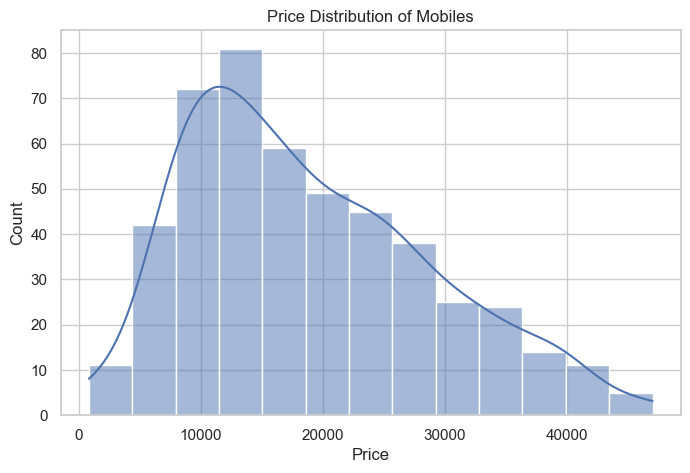

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution of Mobiles")
plt.show()


**Rating Distribution**

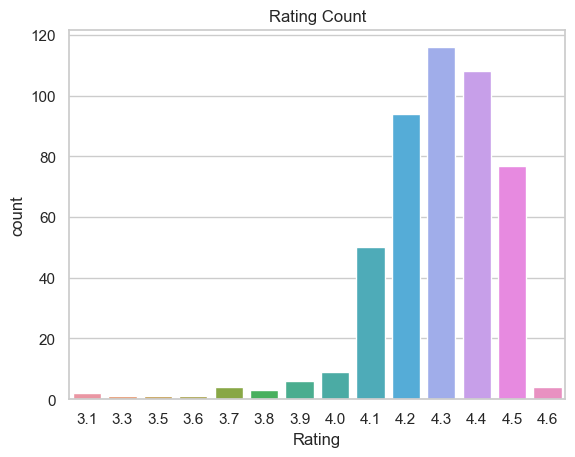

In [16]:
sns.countplot(x='Rating', data=df)
plt.title("Rating Count")
plt.show()


**Brand Count**

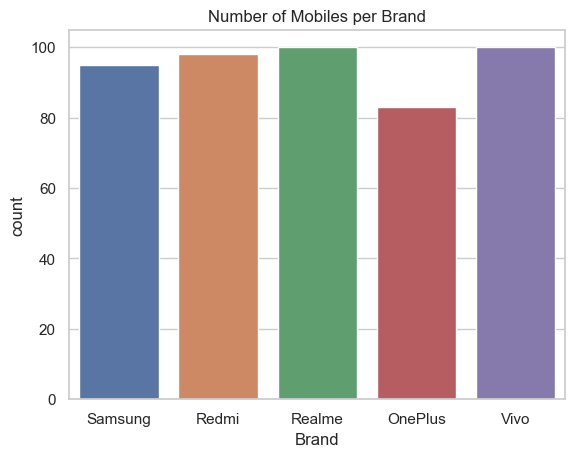

In [17]:
sns.countplot(x='Brand', data=df)
plt.title("Number of Mobiles per Brand")
plt.show()


### 2. BI-VARIATE ANALYSIS

**Average Price by Brand**

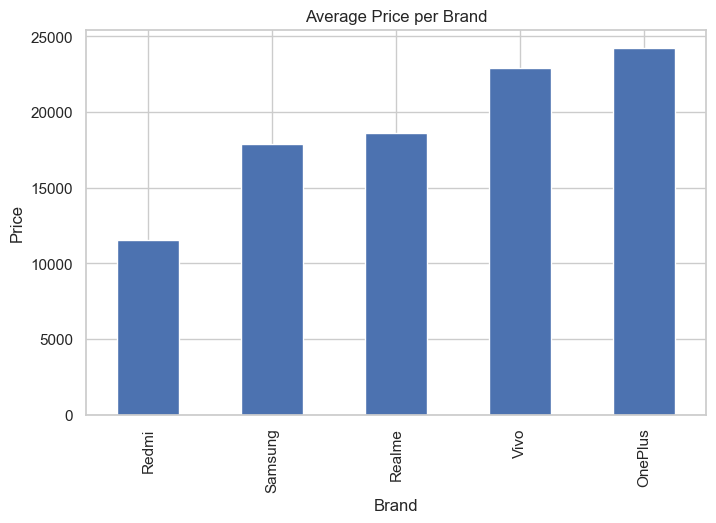

In [18]:
avg_price = df.groupby("Brand")["Price"].mean().sort_values()

avg_price.plot(kind='bar', figsize=(8,5))
plt.title("Average Price per Brand")
plt.ylabel("Price")
plt.show()


**Average Rating by Brand**

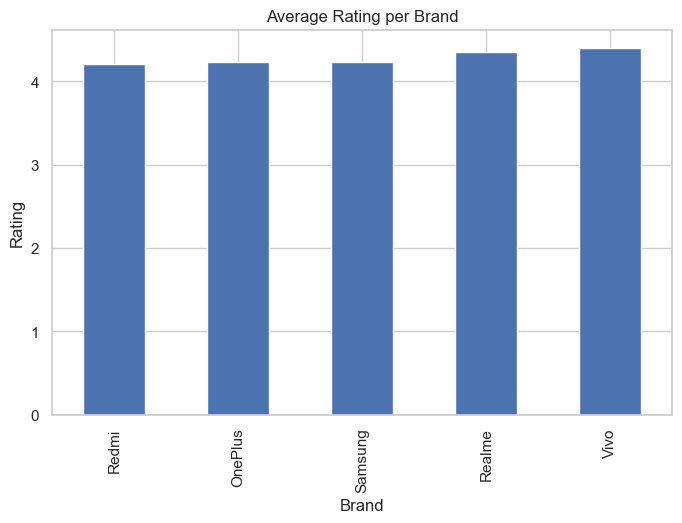

In [19]:
avg_rating = df.groupby("Brand")["Rating"].mean().sort_values()

avg_rating.plot(kind='bar', figsize=(8,5))
plt.title("Average Rating per Brand")
plt.ylabel("Rating")
plt.show()


**Correlation heatmap**

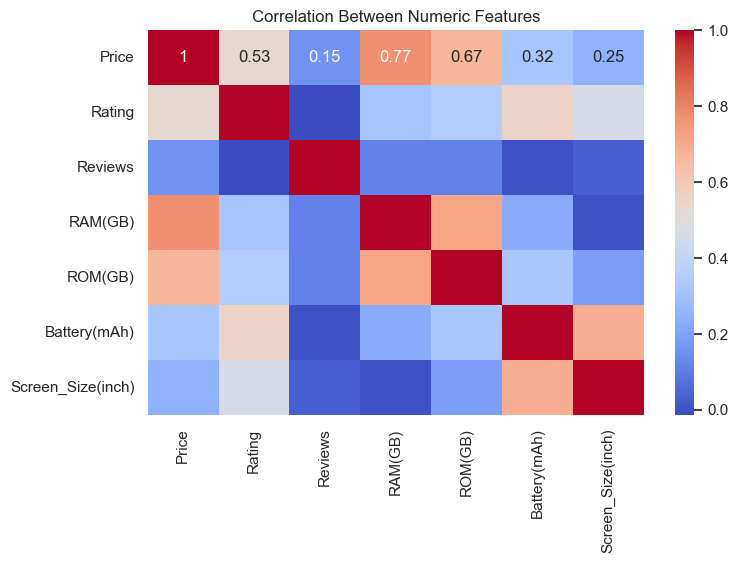

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()


### 3. MULTIVARIATE ANALYSIS

**Scatter Plot (Price vs Rating)**

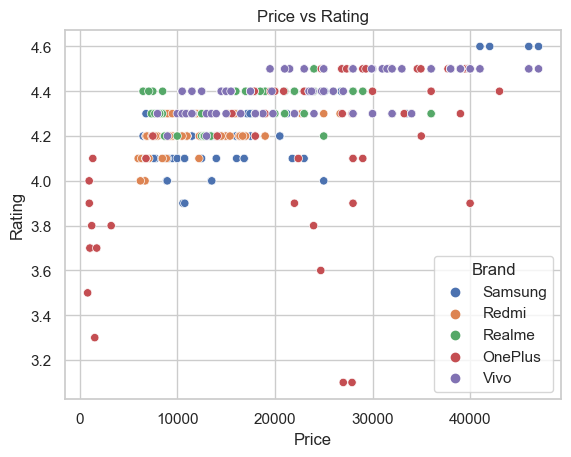

In [23]:
sns.scatterplot(data=df, x='Price', y='Rating', hue='Brand')
plt.title("Price vs Rating")
plt.show()


**Reviews vs Price**

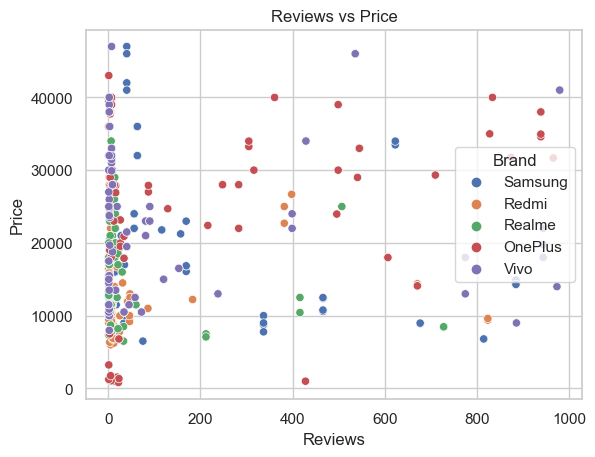

In [24]:
sns.scatterplot(data=df, x='Reviews', y='Price', hue='Brand')
plt.title("Reviews vs Price")
plt.show()


# Brand Performance Comparison Based on Ratings and Reviews

In [ ]:
     Brand    Rating    Reviews         Price
0  OnePlus  4.264948   717028.0  29356.591837
1   Realme  4.355000  1054527.0  18618.660000
2    Redmi  4.206000  1839711.0  11557.285714
3  Samsung  4.239796  1422265.0  18860.646465
4     Vivo  4.401000  2675119.0  22878.890000

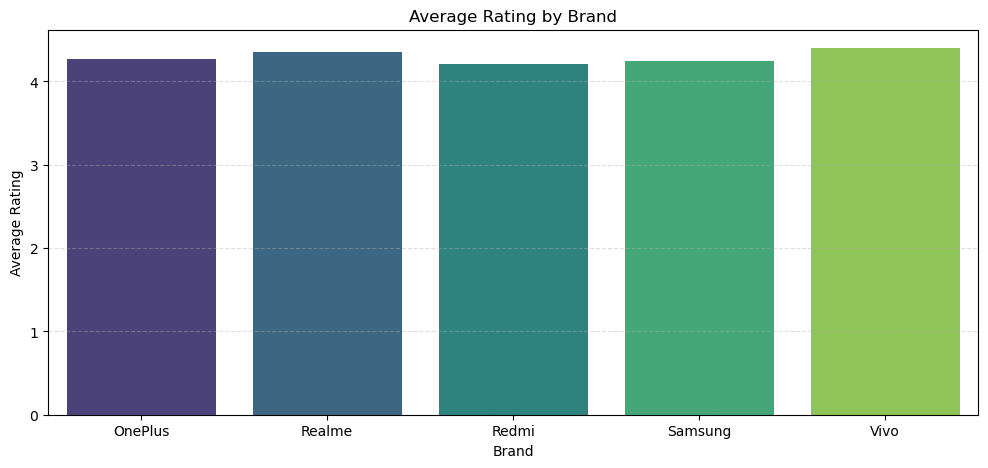

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mobile_Dataset.csv")

# Clean numeric columns
for col in ["Rating", "Reviews"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", "")
        .str.extract(r'(\d+\.?\d*)')[0]
        .astype(float)
    )

# Group data
brand_rating = df.groupby("Brand")["Rating"].mean().reset_index()

# Plot
plt.figure(figsize=(12,5))
sns.barplot(data=brand_rating, x="Brand", y="Rating", palette="viridis")
plt.title("Average Rating by Brand")
plt.ylabel("Average Rating")
plt.xlabel("Brand")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


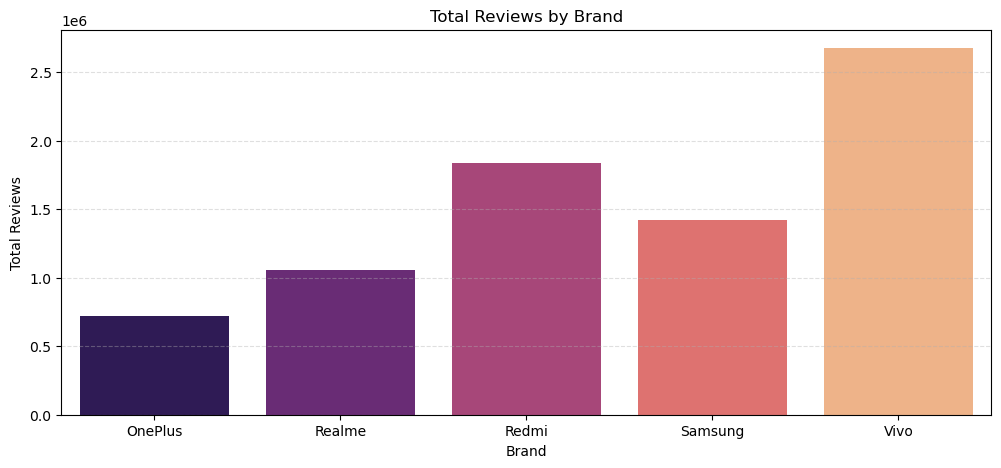

In [9]:
brand_reviews = df.groupby("Brand")["Reviews"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=brand_reviews, x="Brand", y="Reviews", palette="magma")
plt.title("Total Reviews by Brand")
plt.ylabel("Total Reviews")
plt.xlabel("Brand")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()
